In [1]:
import pandas as pd
import numpy as np
import altair as alt
df = pd.read_csv("OriginsOfSketch.csv")

In [2]:
codelist = list(set(df.as_matrix().flatten()))
codelist.remove(np.nan)

actionOnly= list(filter(lambda x: x.isupper(),codelist))
featureOnly= list(filter(lambda x: x.islower(),codelist))

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [3]:
# df["t"]=df.index

In [4]:
df = df.stack().reset_index()

df = df.rename(columns={
    "level_0":"t",
    "level_1":"user",
    0:"action"
})

In [34]:
itemsOfInterest = ['drag-and-drop (result)','drag-and-drop (cluster)','drag-and-drop (OOI)','drag-and-drop (outlier)','sketch-to-query','sketch-to-modify']

In [35]:
df = df[df.action.isin(itemsOfInterest)]

In [36]:
df_freq = df.groupby("action").count().reset_index()[["action","t"]].rename(columns={"t":"Usage Frequency","action":"Feature"})

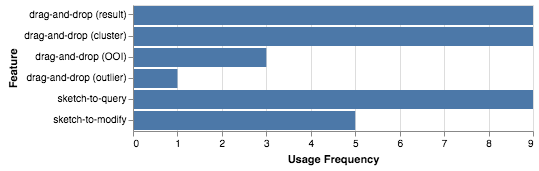

In [39]:
alt.Chart(df_freq).mark_bar().encode(
    alt.X("Usage Frequency"),
    alt.Y("Feature",sort= itemsOfInterest),
#     color = "subject"
)

In [43]:
df['subject'] = df['user'].apply(lambda x: {'A':'astro', 'G':'genetics', 'M':'material science'}[x[0]])
df_freq = df.groupby(["subject","action"]).count().reset_index()[["action","t","subject"]].rename(columns={"t":"Usage Frequency","action":"Feature"})

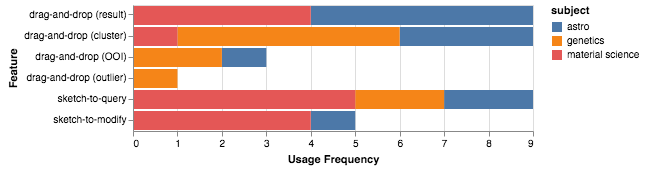

In [45]:
alt.Chart(df_freq).mark_bar().encode(
    alt.X("Usage Frequency"),
    alt.Y("Feature",sort= itemsOfInterest),
    color = "subject"
)